<a href="https://colab.research.google.com/github/dp1500/Covid19-new-deaths-per-day-prediction/blob/main/Covid19_forecasting_Update2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

In [35]:
data = pd.read_csv('https://drive.google.com/uc?id=1PzAcx0rnsAs96qnAdH9is8JMF9WUHj_W')
data.head()

,iso_code,location,date,new_deaths,new_cases,new_tests,new_vaccinations,new_cases_per_thousand,new_tests_per-thousand,new_vaccinations_per_thousand,stringency_index
0,IND,India,1/16/2021,181,15144,803090,191181,15.144,803.090,191.181,68.98
1,IND,India,1/17/2021,145,13788,779377,33120,13.788,779.377,33.120,68.98
2,IND,India,1/18/2021,137,10050,548168,229748,10.050,548.168,229.748,68.98
3,IND,India,1/19/2021,162,13816,709791,220786,13.816,709.791,220.786,68.98
4,IND,India,1/20/2021,151,15244,764120,131649,15.244,764.120,131.649,68.98


In [36]:
df = data[['new_cases', 'new_tests', 'new_vaccinations','stringency_index']]

In [37]:
df['new_deaths'] = data['new_deaths']
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,new_cases,new_tests,new_vaccinations,stringency_index,new_deaths
0,15144,803090,191181,68.98,181
1,13788,779377,33120,68.98,145
2,10050,548168,229748,68.98,137
3,13816,709791,220786,68.98,162
4,15244,764120,131649,68.98,151


In [38]:
data['location'].unique()

array(['India', 'Israel', 'Japan'], dtype=object)

In [32]:
country = "India"
data = data[data['location']==country]

In [33]:
data['date'] = pd.to_datetime(data['date'])
data.sort_values('date',ascending=True,inplace=True)
data['date'].min(), data['date'].max()

(Timestamp('2021-01-16 00:00:00'), Timestamp('2021-07-05 00:00:00'))

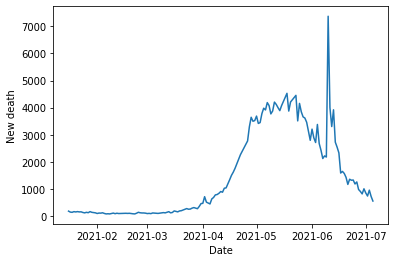

In [8]:
plt.xlabel('Date')
plt.ylabel('New death')
plt.plot(data['date'],data['new_deaths'])

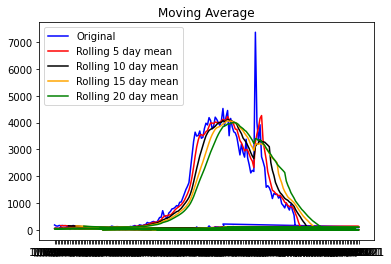

In [46]:
rolling_mean5 = data['new_deaths'].rolling(window = 5).mean()
rolling_mean10 = data['new_deaths'].rolling(window = 10).mean()
rolling_mean15 = data['new_deaths'].rolling(window = 15).mean()
rolling_mean20 = data['new_deaths'].rolling(window = 20).mean()
plt.plot(data['date'],data['new_deaths'], color = 'blue', label = 'Original')
plt.plot(data['date'],rolling_mean5, color = 'red', label = 'Rolling 5 day mean')
plt.plot(data['date'],rolling_mean10, color = 'black', label = 'Rolling 10 day mean')
plt.plot(data['date'],rolling_mean15, color = 'orange', label = 'Rolling 15 day mean')
plt.plot(data['date'],rolling_mean20, color = 'green', label = 'Rolling 20 day mean')
plt.legend(loc = 'best')
plt.title('Moving Average')
plt.show()

In [10]:
data['moving_avg_5day'] = rolling_mean5
data['moving_avg_10day'] = rolling_mean10
data['moving_avg_15day'] = rolling_mean15
data['moving_avg_20day'] = rolling_mean20
data.head()

,iso_code,location,date,new_deaths,new_cases,new_tests,new_vaccinations,new_cases_per_thousand,new_tests_per-thousand,new_vaccinations_per_thousand,stringency_index,moving_avg_5day,moving_avg_10day,moving_avg_15day,moving_avg_20day
0,IND,India,2021-01-16,181,15144,803090,191181,15.144,803.090,191.181,68.98,NaN,NaN,NaN,NaN
1,IND,India,2021-01-17,145,13788,779377,33120,13.788,779.377,33.120,68.98,NaN,NaN,NaN,NaN
2,IND,India,2021-01-18,137,10050,548168,229748,10.050,548.168,229.748,68.98,NaN,NaN,NaN,NaN
3,IND,India,2021-01-19,162,13816,709791,220786,13.816,709.791,220.786,68.98,NaN,NaN,NaN,NaN
4,IND,India,2021-01-20,151,15244,764120,131649,15.244,764.120,131.649,68.98,155.2,NaN,NaN,NaN


In [11]:
data.dropna(inplace=True)

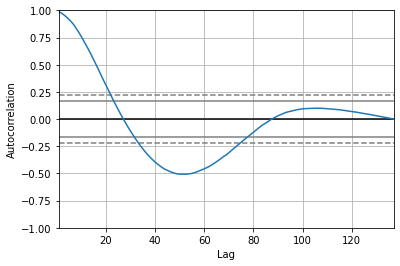

In [12]:
autocorrelation_plot(data['new_cases'])
plt.show()

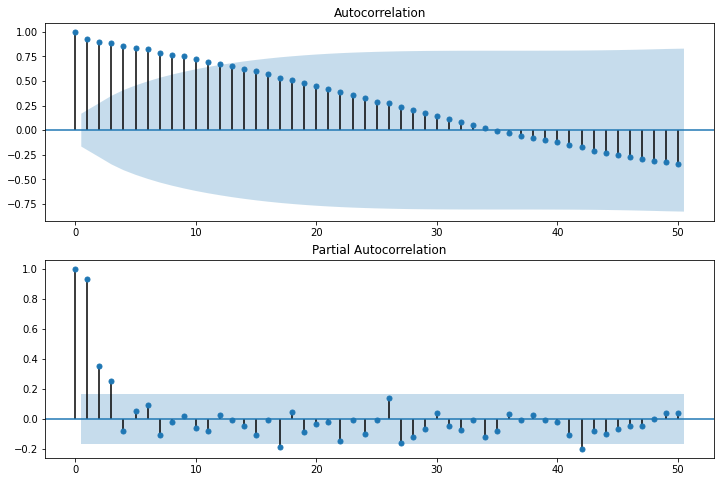

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['new_deaths'].dropna(),lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['new_deaths'].dropna(),lags=50,ax=ax2)


In [14]:
# 1,1,0 ARIMA Model
model = ARIMA(data.new_deaths, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.new_deaths   No. Observations:                  136
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1051.428
Method:                       css-mle   S.D. of innovations            550.949
Date:                Sat, 08 Oct 2022   AIC                           2108.857
Time:                        15:30:35   BIC                           2117.595
Sample:                             1   HQIC                          2112.408
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.5856     34.798      0.103      0.918     -64.617      71.788
ar.L1.D.new_deaths    -0.3603      0.080     -4.529      0.000      -0.516      -0.204
                    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecastin

In [15]:
# 1,1,0 ARIMA Model
model = ARIMA(data.new_deaths, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecastin

                             ARIMA Model Results                              
Dep. Variable:           D.new_deaths   No. Observations:                  136
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1046.044
Method:                       css-mle   S.D. of innovations            529.180
Date:                Sat, 08 Oct 2022   AIC                           2106.088
Time:                        15:30:35   BIC                           2126.477
Sample:                             1   HQIC                          2114.373
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.2815     24.706      0.173      0.862     -44.142      52.705
ar.L1.D.new_deaths    -0.4356      0.085     -5.115      0.000      -0.602      -0.269
ar.L2.D.new_deaths  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Test MAE: 133.598


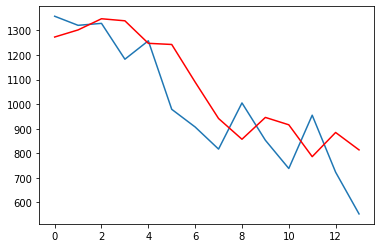

In [16]:
X = data['new_deaths'].values
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
traindf, testdf = data[0:size], data[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [17]:
mae5day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_5day'])
mae10day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_10day'])
mae15day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_15day'])
mae20day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_20day'])

In [18]:
print(f'Mean absolute error from 5day moving average prediction: {mae5day}')
print(f'Mean absolute error from 10day moving average prediction: {mae10day}')
print(f'Mean absolute error from 15day moving average prediction: {mae15day}')
print(f'Mean absolute error from 20day moving average prediction: {mae20day}')

Mean absolute error from 5day moving average prediction: 110.38571428571426
Mean absolute error from 10day moving average prediction: 297.4928571428572
Mean absolute error from 15day moving average prediction: 670.4666666666666
Mean absolute error from 20day moving average prediction: 991.2785714285712


## data for ml Predictions

In [39]:
x = df.iloc[:156, :-1]
y = df.iloc[:156, -1]
y.shape

(156,)

In [40]:
n = int(len(x)*0.9)
xTrain = x[:n]
yTrain = y[:n]

xTest, yTest = x[n:], y[n:]

## **Using SGDregressor**

In [41]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3, alpha =0))
reg.fit(x,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(alpha=0))])

In [42]:
predictionsSGD = reg.predict(x)
# reg.score(predictions, yTest)

In [47]:
from matplotlib import pyplot as plt

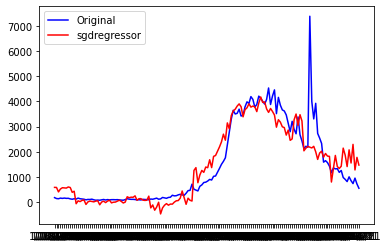

In [48]:
plt.plot(data['date'][:156],data['new_deaths'][:156], color = 'blue', label = 'Original')
plt.plot(data['date'][:156],predictionsSGD, color = 'red', label = 'sgdregressor')
plt.legend(loc = 'best')
plt.show()

## **Using Random Forest Regressor**

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=1, random_state=0, max_features= 4)
regr.fit(x, y)

RandomForestRegressor(max_depth=1, max_features=4, random_state=0)

In [64]:
predictionsRF = regr.predict(x)

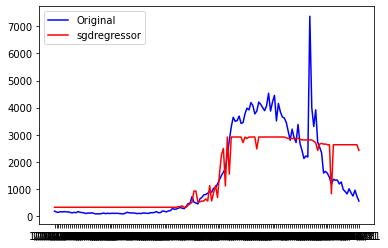

In [65]:
plt.plot(data['date'][:156],data['new_deaths'][:156], color = 'blue', label = 'Original')
plt.plot(data['date'][:156],predictionsRF, color = 'red', label = 'random forest')
plt.legend(loc = 'best')
plt.show()

## USING SVM REGRESSION

In [67]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [68]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2, kernel='rbf'))
regr.fit(x, y)
predictionsSVM = reg.predict(x)

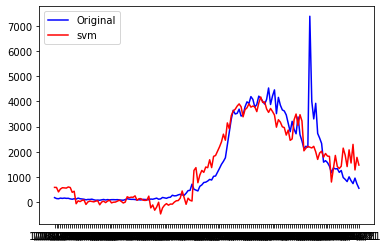

In [69]:
plt.plot(data['date'][:156],data['new_deaths'][:156], color = 'blue', label = 'Original')
plt.plot(data['date'][:156],predictionsSVM, color = 'red', label = 'svm')
plt.legend(loc = 'best')
plt.show()